In [4]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [5]:
# Load FAOSTAT_data_en_1-1-2023.csv file into dataframe (df)
df = pd.read_csv('FAOSTAT_data_en_1-1-2023.csv',encoding_errors='ignore')

In [6]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,38049.0,A,Official figure
1,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,38885.0,A,Official figure
2,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,40251.0,A,Official figure
3,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,41566.0,A,Official figure
4,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,44665.0,A,Official figure


In [7]:
df.shape

(17050, 14)

In [8]:
df.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,17050.000000,17050.0,17050.000000,17050.000000,17050.000000,1.705000e+04
mean,406.090205,5510.0,22173.332982,1993.396364,1993.396364,2.553436e+05
std,228.779659,0.0,628.757617,17.453123,17.453123,1.224306e+06
min,40.000000,5510.0,21521.000000,1961.000000,1961.000000,0.000000e+00
25%,246.000000,5510.0,22120.000000,1979.000000,1979.000000,3.338000e+03
50%,352.000000,5510.0,22212.000000,1995.000000,1995.000000,2.024236e+04
75%,620.000000,5510.0,22241.010000,2009.000000,2009.000000,8.217858e+04
max,891.000000,5510.0,26110.000000,2020.000000,2020.000000,2.081474e+07


In [9]:
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

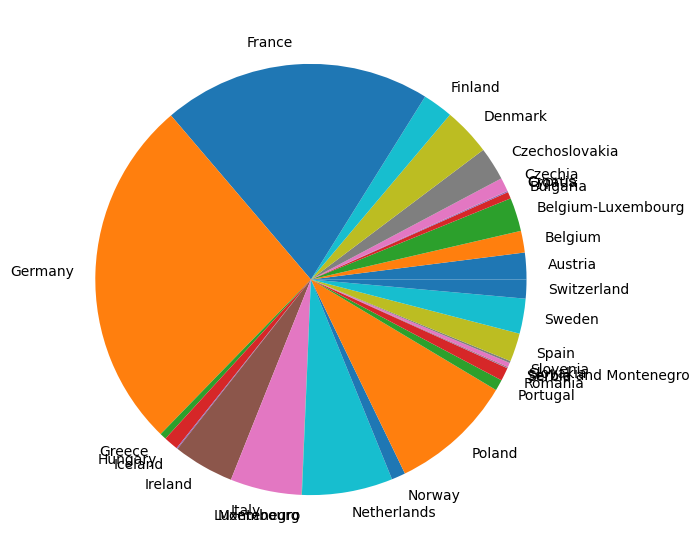

In [10]:
# Creating dataset
data = []
 
for Area in df["Area"].unique():
    data.append(df[df['Area'] == Area]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df["Area"].unique())
 
# show plot
plt.show()  

In [11]:
domain = df["Domain"].unique()
print(domain)

['Crops and livestock products']


In [12]:
item = df["Item"].unique()
print(item)

['Butter of cow milk' 'Buttermilk, dry'
 'Cheese from milk of goats, fresh or processed'
 'Cheese from milk of sheep, fresh or processed'
 'Cheese from skimmed cow milk' 'Cheese from whole cow milk'
 'Cream, fresh' 'Pig fat, rendered' 'Skim milk and whey powder'
 'Skim milk of cows' 'Tallow' 'Whey, condensed' 'Whey, dry'
 'Whole milk powder' 'Whole milk, condensed' 'Whole milk, evaporated'
 'Yoghurt' 'Skim milk, condensed' 'Ghee from cow milk'
 'Raw silk (not thrown)' 'Skim milk, evaporated'
 'Cheese from milk of buffalo, fresh or processed' 'Butter of goat milk']


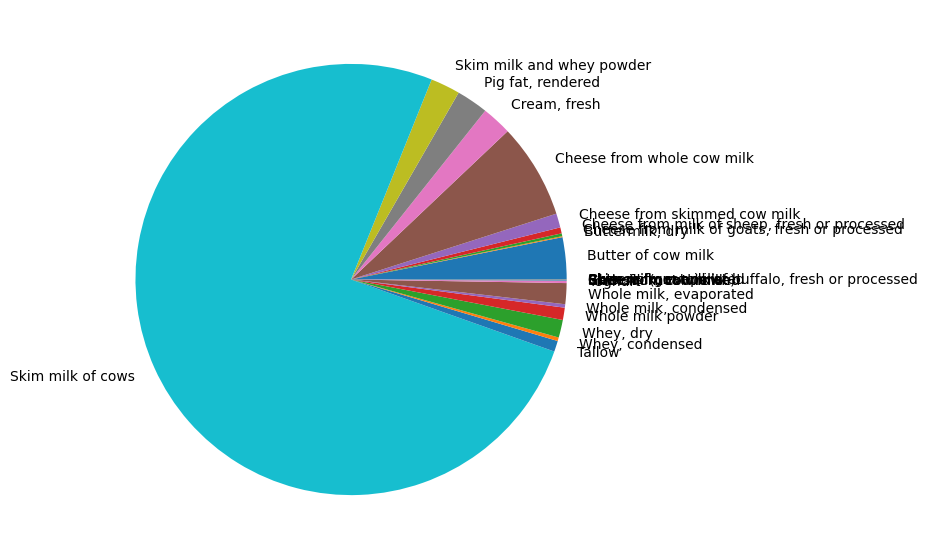

In [13]:
# Creating dataset
data = []
 
for item in df["Item"].unique():
    data.append(df[df['Item'] == item]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df["Item"].unique())
 
# show plot
plt.show()  

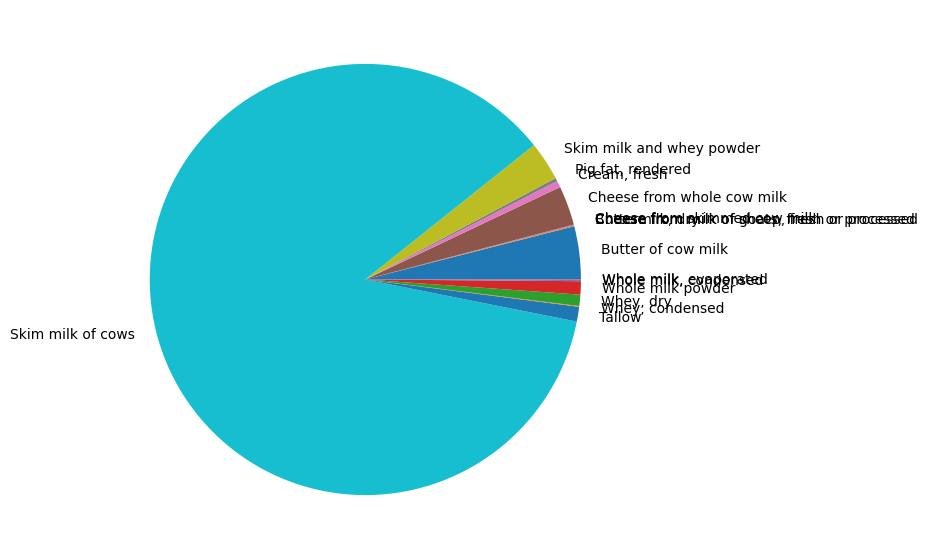

In [14]:
# Creating dataset
data = []

df2 = df[df['Area'] == "Ireland"]
for item in df2["Item"].unique():
    data.append(df2[df2['Item'] == item]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df2["Item"].unique())
 
# show plot
plt.show()  

# Preparing data for Time series analysis 

In [58]:
df_ireland = df[df['Area'] == "Ireland"]

In [63]:
df_skim_milk_of_cows_europe = df[df['Item'] == "Skim milk of cows"]
df_skim_milk_of_cows_ireland = df_ireland[df_ireland['Item'] == "Skim milk of cows"]

In [64]:
df_skim_milk_of_cows_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
9041,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1961,1961,tonnes,1423066.0,I,Imputed value
9042,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1962,1962,tonnes,1455214.0,I,Imputed value
9043,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1963,1963,tonnes,1402856.0,I,Imputed value
9044,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1964,1964,tonnes,1480782.0,I,Imputed value
9045,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1965,1965,tonnes,1501086.0,I,Imputed value


In [65]:
df_skim_milk_of_cows_europe.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
487,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1961,1961,tonnes,1135648.0,I,Imputed value
488,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1962,1962,tonnes,1151012.0,I,Imputed value
489,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1963,1963,tonnes,1154600.0,I,Imputed value
490,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1964,1964,tonnes,1143560.0,I,Imputed value
491,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1965,1965,tonnes,1139880.0,I,Imputed value


In [52]:
df_skim_milk_of_cows_ireland["Year"].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [54]:
years = df_skim_milk_of_cows_ireland["Year"].unique()
years.sort()
values = []
strYears = []

for year in years:
    dfx = df_skim_milk_of_cows_ireland[df_skim_milk_of_cows_ireland['Year'] == year] 
    value = dfx["Value"].sum()
    values.append(value)
    strYears.append(str(year))
                  
data = {
  "Year": years,
  "Value": values
}
df3 = pd.DataFrame(data)


In [67]:
years = df_skim_milk_of_cows_europe["Year"].unique()
years.sort()
values = []
strYears = []

for year in years:
    dfx = df_skim_milk_of_cows_europe[df_skim_milk_of_cows_europe['Year'] == year] 
    value = dfx["Value"].sum()
    values.append(value)
    strYears.append(str(year))
                  
data = {
  "Year": years,
  "Value": values
}
df4 = pd.DataFrame(data)

In [68]:
df3.to_csv('TimeSeries_skim_milk_of_cows_ireland.csv')
df4.to_csv('TimeSeries_skim_milk_of_cows_europe.csv')